In [11]:
import numpy as np
import matplotlib.pyplot as plt
import openml
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import pandas as pd


In [12]:
dataset = openml.datasets.get_dataset(43672)  # ID 61 is for the Iris dataset
X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute)

In [13]:
dataset

OpenML Dataset
Name.........: Heart-Disease-Dataset-(Comprehensive)
Version......: 1
Format.......: arff
Upload Date..: 2022-03-24 01:21:21
Licence......: CC0: Public Domain
Download URL.: https://api.openml.org/data/v1/download/22102497/Heart-Disease-Dataset-(Comprehensive).arff
OpenML URL...: https://www.openml.org/d/43672
# of features: None

In [14]:
X.isna().sum()

age                    0
sex                    0
chest_pain_type        0
resting_bp_s           0
cholesterol            0
fasting_blood_sugar    0
resting_ecg            0
max_heart_rate         0
exercise_angina        0
oldpeak                0
ST_slope               0
dtype: int64

In [15]:
X

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope
0,40,1,2,140,289,0,0,172,0,0.0,1
1,49,0,3,160,180,0,0,156,0,1.0,2
2,37,1,2,130,283,0,1,98,0,0.0,1
3,48,0,4,138,214,0,0,108,1,1.5,2
4,54,1,3,150,195,0,0,122,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2
1186,68,1,4,144,193,1,0,141,0,3.4,2
1187,57,1,4,130,131,0,0,115,1,1.2,2
1188,57,0,2,130,236,0,2,174,0,0.0,2


In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   uint8  
 1   sex                  1190 non-null   uint8  
 2   chest_pain_type      1190 non-null   uint8  
 3   resting_bp_s         1190 non-null   uint8  
 4   cholesterol          1190 non-null   int64  
 5   fasting_blood_sugar  1190 non-null   uint8  
 6   resting_ecg          1190 non-null   uint8  
 7   max_heart_rate       1190 non-null   uint8  
 8   exercise_angina      1190 non-null   uint8  
 9   oldpeak              1190 non-null   float64
 10  ST_slope             1190 non-null   uint8  
dtypes: float64(1), int64(1), uint8(9)
memory usage: 29.2 KB


In [17]:
X.isna().sum()

age                    0
sex                    0
chest_pain_type        0
resting_bp_s           0
cholesterol            0
fasting_blood_sugar    0
resting_ecg            0
max_heart_rate         0
exercise_angina        0
oldpeak                0
ST_slope               0
dtype: int64

In [18]:
pd.options.mode.chained_assignment = None
X.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope']
X['chest_pain_type'][X['chest_pain_type'] == 1] = 'typical angina'
X['chest_pain_type'][X['chest_pain_type'] == 2] = 'atypical angina'
X['chest_pain_type'][X['chest_pain_type'] == 3] = 'non-anginal pain'
X['chest_pain_type'][X['chest_pain_type'] == 4] = 'asymptomatic'



X['rest_ecg'][X['rest_ecg'] == 0] = 'normal'
X['rest_ecg'][X['rest_ecg'] == 1] = 'ST-T wave abnormality'
X['rest_ecg'][X['rest_ecg'] == 2] = 'left ventricular hypertrophy'


X['st_slope'][X['st_slope'] == 0] = 'normal'
X['st_slope'][X['st_slope'] == 1] = 'upsloping'
X['st_slope'][X['st_slope'] == 2] = 'flat'
X['st_slope'][X['st_slope'] == 3] = 'downsloping'

In [19]:
X = pd.get_dummies(X, drop_first=True)
X.head()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_normal,st_slope_upsloping
0,40,1,140,289,0,172,0,0.0,1,0,0,0,1,0,0,1
1,49,0,160,180,0,156,0,1.0,0,1,0,0,1,1,0,0
2,37,1,130,283,0,98,0,0.0,1,0,0,0,0,0,0,1
3,48,0,138,214,0,108,1,1.5,0,0,0,0,1,1,0,0
4,54,1,150,195,0,122,0,0.0,0,1,0,0,1,0,0,1


In [20]:
# Normalize data (min-max normalization)
X = (X - X.min()) / (X.max() - X.min())

In [21]:
X = X.to_numpy().astype(float)  

In [22]:
y = y.to_numpy().astype(int)  

In [23]:
X

array([[0.24489796, 1.        , 0.7       , ..., 0.        , 0.        ,
        1.        ],
       [0.42857143, 0.        , 0.8       , ..., 1.        , 0.        ,
        0.        ],
       [0.18367347, 1.        , 0.65      , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.59183673, 1.        , 0.65      , ..., 1.        , 0.        ,
        0.        ],
       [0.59183673, 0.        , 0.65      , ..., 1.        , 0.        ,
        0.        ],
       [0.20408163, 1.        , 0.69      , ..., 0.        , 0.        ,
        1.        ]])

# knn

Kernel Types:
Uniform Kernel; Triangular Kernel; Epanechnikov Kernel; Gaussian Kernel
Window Types:
Fixed Window (Parzen-Rosenblatt): Distance-based threshold, where points are counted within a fixed radius ℎ
Neighbor-dependent Window: Distance to the 𝑘 nearest neighbor determines the threshold.

In [24]:
epsilon = 1e-10

def uniform_kernel(d, h):
    return np.where(d <= h, 1, 0)

def triangular_kernel(d, h):
    h = max(h, epsilon)  
    return np.where(d <= h, 1 - d / h, 0)

def epanechnikov_kernel(d, h):
    h = max(h, epsilon)  
    return np.where(d <= h, 3 / 4 * (1 - (d / h) ** 2), 0)

def gaussian_kernel(d, h):
    h = max(h, epsilon) 
    return np.exp(-0.5 * (d / h) ** 2)


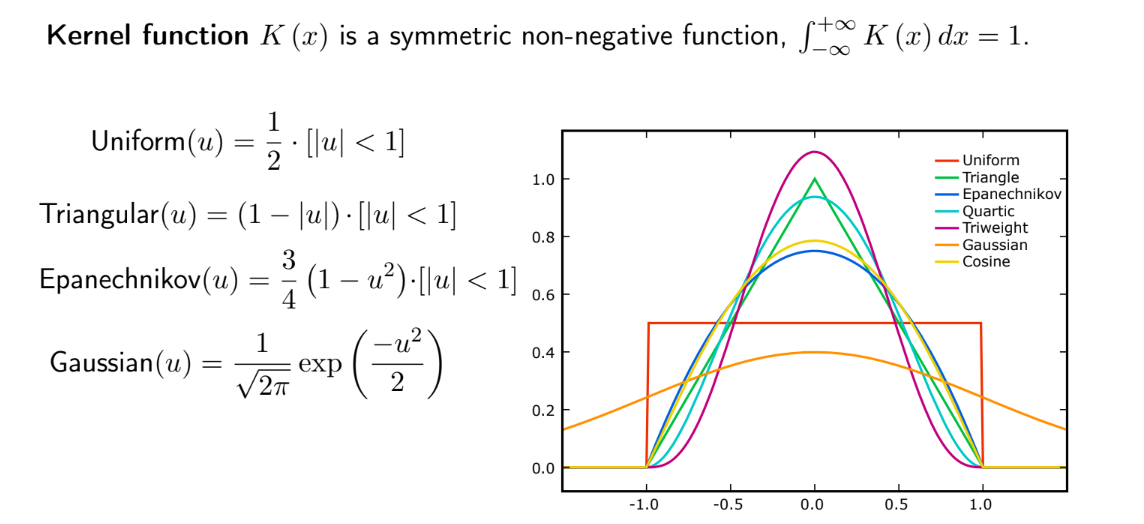

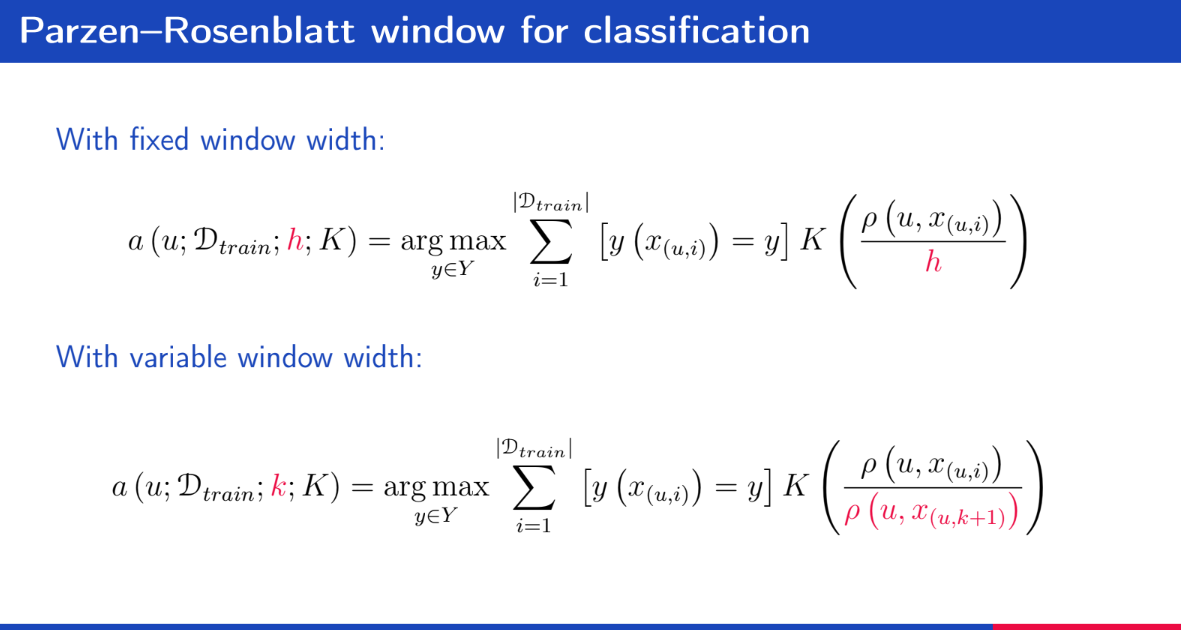

In [25]:
# kNN class
class kNN:
    def __init__(self, k=5, kernel=uniform_kernel, window='fixed'):
        self.k = k
        self.kernel = kernel
        self.window = window

    def fit(self, X, y):
        self.X_train = np.asarray(X, dtype=float)
        self.y_train = np.asarray(y, dtype=int)

    def predict(self, X):
        X = np.asarray(X, dtype=float)
        predictions = []
        
        for x in X:
            distances = np.linalg.norm(self.X_train - x, axis=1)
            if self.window == 'fixed':
                h = np.mean(distances)  
            else:
                h = np.partition(distances, self.k)[self.k - 1]  

            weights = self.kernel(distances, h)

            k_neighbors = np.argsort(distances)[:self.k]
            k_weights = weights[k_neighbors]
            k_labels = self.y_train[k_neighbors]

            label_sum = np.bincount(k_labels, weights=k_weights, minlength=2)
            predicted_label = np.argmax(label_sum)
            predictions.append(predicted_label)

        return np.array(predictions)

In [26]:
def cross_validate_knn(model, X, y, folds=5):
    kf = KFold(n_splits=folds, shuffle=True, random_state=42)  
    f1_scores = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        score = f1_score(y_val, y_pred)  
        f1_scores.append(score)

    return np.mean(f1_scores)

In [27]:
def hyperparameter_tuning_knn(X, y):
    best_score = 0
    best_params = None
    scores_visualise = [] 
    kernel_types = [uniform_kernel, triangular_kernel, epanechnikov_kernel, gaussian_kernel]
    kernel_names = ['Uniform', 'Triangular', 'Epanechnikov', 'Gaussian']
    window_types = ['fixed', 'neighbor']
    k_values = [i for i in range(1,40,2)]

    for kernel in kernel_types:
        for window in window_types:
            for k in k_values:
                model = kNN(k=k, kernel=kernel, window=window)
                score = cross_validate_knn(model, X, y)
                scores_visualise.append({'k': k, 'kernel': kernel.__name__, 'window': window, 'f1': float(score)})
        
                if score > best_score:
                    best_score = score
                    best_params = {'k': k, 'kernel': kernel.__name__, 'window': window}

    return best_params, best_score, scores_visualise

In [28]:
best_params, best_score, scores_visualise = hyperparameter_tuning_knn(X, y)

print("Best hyperparameters:", best_params)
print("Best F1 score:", best_score)

Best hyperparameters: {'k': 1, 'kernel': 'uniform_kernel', 'window': 'fixed'}
Best F1 score: 0.9062331312192816


In [29]:
scores_visualise



[{'k': 1,
  'kernel': 'uniform_kernel',
  'window': 'fixed',
  'f1': 0.9062331312192816},
 {'k': 3,
  'kernel': 'uniform_kernel',
  'window': 'fixed',
  'f1': 0.8469009646480001},
 {'k': 5,
  'kernel': 'uniform_kernel',
  'window': 'fixed',
  'f1': 0.8615784859160793},
 {'k': 7,
  'kernel': 'uniform_kernel',
  'window': 'fixed',
  'f1': 0.8493081032979998},
 {'k': 9,
  'kernel': 'uniform_kernel',
  'window': 'fixed',
  'f1': 0.8563253654181823},
 {'k': 11,
  'kernel': 'uniform_kernel',
  'window': 'fixed',
  'f1': 0.8573292651840593},
 {'k': 13,
  'kernel': 'uniform_kernel',
  'window': 'fixed',
  'f1': 0.8570538312667711},
 {'k': 15,
  'kernel': 'uniform_kernel',
  'window': 'fixed',
  'f1': 0.8596529635384942},
 {'k': 17,
  'kernel': 'uniform_kernel',
  'window': 'fixed',
  'f1': 0.8594657301032301},
 {'k': 19,
  'kernel': 'uniform_kernel',
  'window': 'fixed',
  'f1': 0.8560869896165071},
 {'k': 21,
  'kernel': 'uniform_kernel',
  'window': 'fixed',
  'f1': 0.8523985572482919},
 {'k

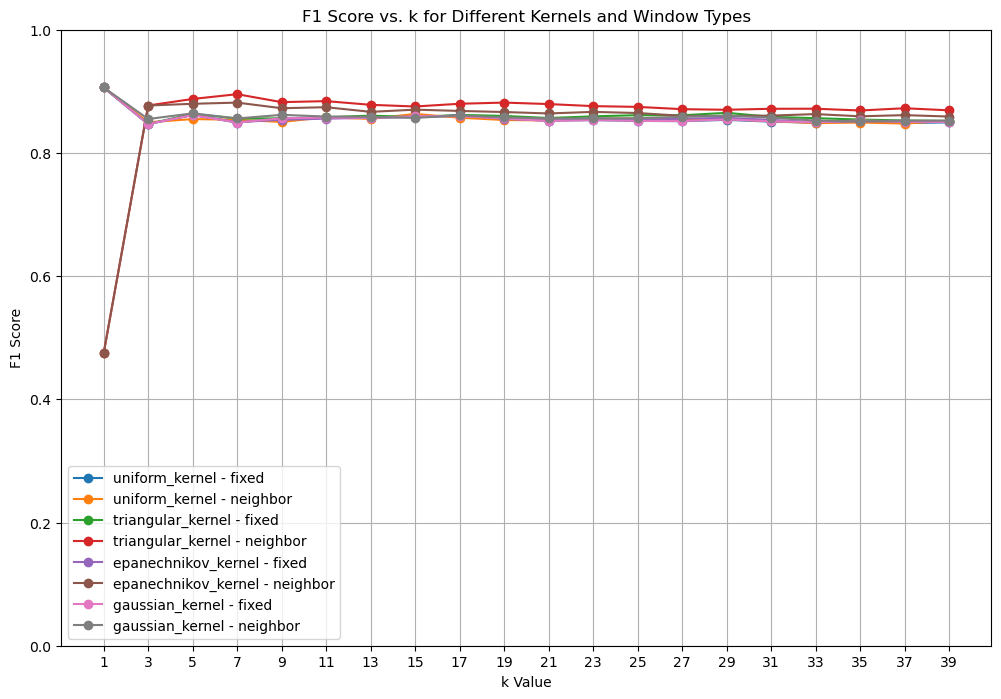

In [30]:
scores_df = pd.DataFrame(scores_visualise)

unique_kernels = scores_df['kernel'].unique()
unique_windows = scores_df['window'].unique()

plt.figure(figsize=(12, 8))

for kernel in unique_kernels:
    for window in unique_windows:
        subset = scores_df[(scores_df['kernel'] == kernel) & (scores_df['window'] == window)]
        
        if not subset.empty:
            plt.plot(subset['k'], subset['f1'], marker='o', label=f'{kernel} - {window}')

# Customizing the plot
plt.title('F1 Score vs. k for Different Kernels and Window Types')
plt.xlabel('k Value')
plt.ylabel('F1 Score')
plt.ylim(0, 1)
plt.xticks(sorted(scores_df['k'].unique()))  
plt.legend()
plt.grid()
plt.show()


# Linear algorithms

## Gradient Descent Linear Regression

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [32]:
class GradientDescent:
    def __init__(self, learning_rate=0.01, max_iter=100, tol=1e-6, batch_size=None, method='batch'):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tol = tol
        self.batch_size = batch_size  
        self.method = method  
        self.w = None  

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features) 

        for iteration in range(self.max_iter):
            if self.method == 'stochastic':
                for i in range(n_samples):
                    self._update_weights(X.iloc[[i]], y.iloc[[i]])
                    
            elif self.method == 'mini-batch':
                indices = np.random.permutation(n_samples)
                for i in range(0, n_samples, self.batch_size):
                    batch_indices = indices[i:i + self.batch_size]
                    X_batch = X.iloc[batch_indices]
                    y_batch = y.iloc[batch_indices]
                    self._update_weights(X_batch, y_batch)
                    
            else:
                gradient = self._compute_gradient(X, y)
                self.w -= self.learning_rate * gradient

            if np.linalg.norm(self._compute_gradient(X, y)) < self.tol:
                print(f'Converged after {iteration} iterations')
                break

    def _update_weights(self, X_batch, y_batch):
        gradient = self._compute_gradient(X_batch, y_batch)
        self.w -= self.learning_rate * gradient

    def _compute_gradient(self, X, y):
        predictions = X.dot(self.w)
        errors = predictions - y.values.flatten()  
        gradient = (X.T.dot(errors)) / len(y)
        return gradient

    def predict(self, X):
        return X.dot(self.w)


In [33]:
def cross_validate_GD(model, X, y, folds=5):
    kf = KFold(n_splits=folds, shuffle=True, random_state=42)  
    f1_scores = []

    for train_indices, val_indices in kf.split(X):
        X_train = X.iloc[train_indices]
        y_train = y.iloc[train_indices]
        X_val = X.iloc[val_indices]
        y_val = y.iloc[val_indices]

        model.fit(X_train, y_train)

        predictions = model.predict(X_val)
        predictions = (predictions > 0.5).astype(int)  

        f1 = f1_score(y_val, predictions)
        f1_scores.append(f1)

    return np.mean(f1_scores)

In [34]:
def hyperparameter_tuning_GD(X, y):
    learning_rates = [0.01, 0.1]
    batch_sizes = [8, 16, 32]
    methods = ['stochastic', 'mini-batch', 'batch']
    
    best_score = 0
    best_params = {}

    for learning_rate in learning_rates:
        for batch_size in batch_sizes:
            for method in methods:
                model = GradientDescent(learning_rate=learning_rate, batch_size=batch_size, method=method)
                score = cross_validate_GD(model, X, y)
                print(f'LR: {learning_rate}, BS: {batch_size}, Method: {method}, F1: {score:.4f}')
                
                if score > best_score:
                    best_score = score
                    best_params = {
                        'learning_rate': learning_rate,
                        'batch_size': batch_size,
                        'method': method
                    }

    return best_params, best_score



In [35]:
X = pd.DataFrame(X)
y = pd.Series(y)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.244898,1.0,0.70,0.479270,0.0,0.788732,0.0,0.295455,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.428571,0.0,0.80,0.298507,0.0,0.676056,0.0,0.409091,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.183673,1.0,0.65,0.469320,0.0,0.267606,0.0,0.295455,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.408163,0.0,0.69,0.354892,0.0,0.338028,1.0,0.465909,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.530612,1.0,0.75,0.323383,0.0,0.436620,0.0,0.295455,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,0.346939,1.0,0.55,0.437811,0.0,0.507042,0.0,0.431818,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1186,0.816327,1.0,0.72,0.320066,1.0,0.570423,0.0,0.681818,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1187,0.591837,1.0,0.65,0.217247,0.0,0.387324,1.0,0.431818,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1188,0.591837,0.0,0.65,0.391376,0.0,0.802817,0.0,0.295455,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [38]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

best_params, best_score = hyperparameter_tuning_GD(X_train, y_train)
print("Best hyperparameters:", best_params)
print("Best F1 score:", best_score)

LR: 0.01, BS: 8, Method: stochastic, F1: 0.6933
LR: 0.01, BS: 8, Method: mini-batch, F1: 0.1823
LR: 0.01, BS: 8, Method: batch, F1: 0.1424
LR: 0.01, BS: 16, Method: stochastic, F1: 0.6933
LR: 0.01, BS: 16, Method: mini-batch, F1: 0.2331
LR: 0.01, BS: 16, Method: batch, F1: 0.1424
LR: 0.01, BS: 32, Method: stochastic, F1: 0.6933
LR: 0.01, BS: 32, Method: mini-batch, F1: 0.2158
LR: 0.01, BS: 32, Method: batch, F1: 0.1424
LR: 0.1, BS: 8, Method: stochastic, F1: 0.5630
LR: 0.1, BS: 8, Method: mini-batch, F1: 0.7008
LR: 0.1, BS: 8, Method: batch, F1: 0.2256
LR: 0.1, BS: 16, Method: stochastic, F1: 0.5630
LR: 0.1, BS: 16, Method: mini-batch, F1: 0.6287
LR: 0.1, BS: 16, Method: batch, F1: 0.2256
LR: 0.1, BS: 32, Method: stochastic, F1: 0.5630
LR: 0.1, BS: 32, Method: mini-batch, F1: 0.5631
LR: 0.1, BS: 32, Method: batch, F1: 0.2256
Best hyperparameters: {'learning_rate': 0.1, 'batch_size': 8, 'method': 'mini-batch'}
Best F1 score: 0.7008104212615491


## SVD

In [39]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.244898,1.0,0.70,0.479270,0.0,0.788732,0.0,0.295455,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.428571,0.0,0.80,0.298507,0.0,0.676056,0.0,0.409091,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.183673,1.0,0.65,0.469320,0.0,0.267606,0.0,0.295455,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.408163,0.0,0.69,0.354892,0.0,0.338028,1.0,0.465909,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.530612,1.0,0.75,0.323383,0.0,0.436620,0.0,0.295455,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,0.346939,1.0,0.55,0.437811,0.0,0.507042,0.0,0.431818,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1186,0.816327,1.0,0.72,0.320066,1.0,0.570423,0.0,0.681818,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1187,0.591837,1.0,0.65,0.217247,0.0,0.387324,1.0,0.431818,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1188,0.591837,0.0,0.65,0.391376,0.0,0.802817,0.0,0.295455,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [40]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.974135,0.567646,-0.107463,1.203085,1.908901,-0.314306,1.285228,0.815794,-0.471253,-0.553081,-0.245222,1.631422,-1.164661,-0.960850,-0.032427,1.108832
1,-2.206896,0.567646,-0.650481,0.882546,-0.523862,1.779797,-0.778072,-0.825757,-0.471253,1.808054,-0.245222,-0.612962,0.858619,-0.960850,-0.032427,1.108832
2,0.231895,-1.761661,0.109744,1.994416,-0.523862,0.396899,1.285228,0.906991,-0.471253,-0.553081,-0.245222,1.631422,-1.164661,1.040745,-0.032427,-0.901850
3,2.458617,0.567646,-0.378972,0.942647,-0.523862,0.871035,1.285228,-0.825757,-0.471253,-0.553081,-0.245222,1.631422,-1.164661,-0.960850,-0.032427,1.108832
4,0.231895,0.567646,-0.324670,-0.439679,-0.523862,0.001785,-0.778072,-0.825757,2.122001,-0.553081,-0.245222,-0.612962,-1.164661,-0.960850,-0.032427,1.108832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,0.443963,0.567646,-0.378972,0.902579,-0.523862,1.226638,-0.778072,-0.825757,-0.471253,-0.553081,-0.245222,1.631422,-1.164661,-0.960850,-0.032427,1.108832
948,0.125860,0.567646,-0.107463,0.521939,-0.523862,0.594455,-0.778072,-0.825757,2.122001,-0.553081,-0.245222,-0.612962,0.858619,-0.960850,-0.032427,1.108832
949,0.762066,0.567646,0.109744,0.241467,-0.523862,0.199342,-0.778072,1.545372,-0.471253,-0.553081,4.077944,-0.612962,0.858619,1.040745,-0.032427,-0.901850
950,0.868101,-1.761661,0.435555,0.582040,-0.523862,0.792012,-0.778072,2.457345,-0.471253,-0.553081,-0.245222,1.631422,-1.164661,-0.960850,-0.032427,-0.901850


In [41]:
y

0       0
1       1
2       0
3       1
4       0
       ..
1185    1
1186    1
1187    1
1188    1
1189    0
Length: 1190, dtype: int32

In [42]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
import openml
import optuna


class SVDClassifier:
    def __init__(self, n_components):
        self.n_components = n_components
        self.U = None
        self.S = None
        self.Vt = None
        self.coef_ = None

    def fit(self, X, y):
        X_centered = X - np.mean(X, axis=0)
        
        self.U, self.S, self.Vt = np.linalg.svd(X_centered, full_matrices=False)
        
        self.U = self.U[:, :self.n_components]
        self.S = np.diag(self.S[:self.n_components])
        self.Vt = self.Vt[:self.n_components, :]
        
        self.coef_ = np.linalg.inv(self.U.T @ self.U) @ self.U.T @ y
        
    def predict(self, X):
        X_centered = X - np.mean(X, axis=0)
        U_new = X_centered @ self.Vt.T[:, :self.n_components]
        return (U_new @ self.coef_ > 0).astype(int)

def objective_SVD(trial):
    n_components = trial.suggest_int("n_components", 1, min(X.shape[1], 20))  # Number of components for SVD
    
    model = SVDClassifier(n_components=n_components)
    
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    f1_scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        f1 = f1_score(y_test, y_pred)
        f1_scores.append(f1)
    

    return np.mean(f1_scores)


study = optuna.create_study(direction="maximize")
study.optimize(objective_SVD, n_trials=50)


best_params = study.best_params
print("Best Parameters:", best_params)


best_model = SVDClassifier(n_components=best_params["n_components"])
kf = KFold(n_splits=5, shuffle=True, random_state=42)


final_scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    final_scores.append(f1)

print("Cross-Validation F1 Score:", np.mean(final_scores))


[I 2024-11-02 16:17:54,838] A new study created in memory with name: no-name-0ed82eaf-a06c-43b0-824f-1adcf6d69092
[I 2024-11-02 16:17:54,904] Trial 0 finished with value: 0.8386611706319833 and parameters: {'n_components': 14}. Best is trial 0 with value: 0.8386611706319833.
[I 2024-11-02 16:17:54,956] Trial 1 finished with value: 0.816070043488698 and parameters: {'n_components': 3}. Best is trial 0 with value: 0.8386611706319833.
[I 2024-11-02 16:17:55,004] Trial 2 finished with value: 0.8386611706319833 and parameters: {'n_components': 16}. Best is trial 0 with value: 0.8386611706319833.
[I 2024-11-02 16:17:55,055] Trial 3 finished with value: 0.8387763223366624 and parameters: {'n_components': 13}. Best is trial 3 with value: 0.8387763223366624.
[I 2024-11-02 16:17:55,103] Trial 4 finished with value: 0.8386611706319833 and parameters: {'n_components': 16}. Best is trial 3 with value: 0.8387763223366624.
[I 2024-11-02 16:17:55,151] Trial 5 finished with value: 0.8392260213215643 an

Best Parameters: {'n_components': 10}
Cross-Validation F1 Score: 0.8403030398939144


# Adaboost

In [43]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.tree import DecisionTreeClassifier

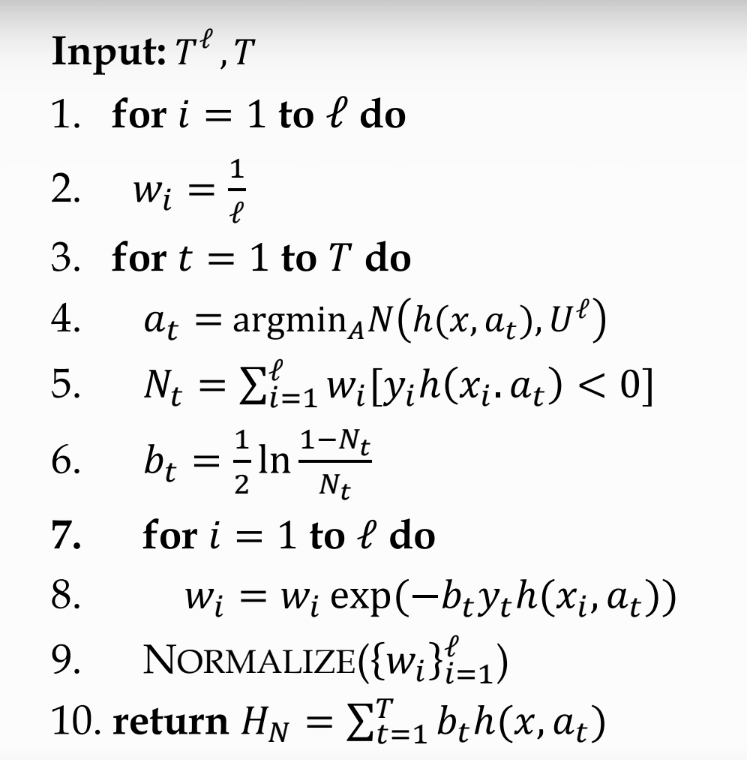

In [48]:
class AdaBoost:
    def __init__(self, n_estimators=50):
        self.n_estimators = n_estimators
        self.alphas = []
        self.models = []
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        w = np.ones(n_samples) / n_samples 

        for _ in range(self.n_estimators):
            best_model = None
            best_alpha = 0
            best_error = float('inf')

            for feature_index in range(n_features):
                unique_values = np.unique(X.iloc[:, feature_index].values)
                for threshold in unique_values:
                    pred = np.ones(n_samples)
                    pred[X.iloc[:, feature_index].values < threshold] = -1
                    error = np.sum(w[pred != y])

                    if error < best_error:
                        best_error = error
                        best_alpha = 0.5 * np.log((1 - error) / (error + 1e-10))
                        best_model = (feature_index, threshold)

            predictions = np.ones(n_samples)
            predictions[X.iloc[:, best_model[0]].values < best_model[1]] = -1
            w *= np.exp(-best_alpha * y * predictions)
            w /= np.sum(w)

            self.models.append(best_model)
            self.alphas.append(best_alpha)

    def predict(self, X):
        pred = np.zeros(X.shape[0])
        for alpha, (feature_index, threshold) in zip(self.alphas, self.models):
            model_predictions = np.ones(X.shape[0])
            model_predictions[X.iloc[:, feature_index].values < threshold] = -1
            pred += alpha * model_predictions
        return np.sign(pred)


    def score(self, X, y):
        predictions = self.predict(X)
        return f1_score(y, predictions, average='weighted')



In [49]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 200, step=10)

    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

    model = AdaBoost(n_estimators=n_estimators)
    model.fit(X_train, y_train)


    predictions = model.predict(X_valid)
    f1 = f1_score(y_valid, predictions, pos_label=1)  
    return f1

y = np.where(y == 1, 1, -1)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)  


print("Best hyperparameters: ", study.best_params)
print("Best F1 score: ", study.best_value)


[I 2024-11-02 16:22:03,579] A new study created in memory with name: no-name-0d2303f6-c092-49a3-a96b-419c2caf93d6
[I 2024-11-02 16:22:13,937] Trial 0 finished with value: 0.8392156862745098 and parameters: {'n_estimators': 140}. Best is trial 0 with value: 0.8392156862745098.
[I 2024-11-02 16:22:15,629] Trial 1 finished with value: 0.8603773584905662 and parameters: {'n_estimators': 20}. Best is trial 1 with value: 0.8603773584905662.
[I 2024-11-02 16:22:19,500] Trial 2 finished with value: 0.84375 and parameters: {'n_estimators': 50}. Best is trial 1 with value: 0.8603773584905662.
[I 2024-11-02 16:22:25,187] Trial 3 finished with value: 0.84375 and parameters: {'n_estimators': 70}. Best is trial 1 with value: 0.8603773584905662.
[I 2024-11-02 16:22:29,982] Trial 4 finished with value: 0.8392156862745098 and parameters: {'n_estimators': 60}. Best is trial 1 with value: 0.8603773584905662.
[I 2024-11-02 16:22:34,238] Trial 5 finished with value: 0.8392156862745098 and parameters: {'n_e

Best hyperparameters:  {'n_estimators': 20}
Best F1 score:  0.8603773584905662
